## stats包

`scipy`计算包提供了[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)子模块来支持与**分布**和**概率**相关的计算.

`stats`子包中包含了几乎所有可能见到的**连续分布**和**离散分布**类型. 而对于所有的连续分布有着同样的方法来进行操作, 离散部分同理, 只是部分函数与连续的有区别.

因此在使用时, 需要首先选择一种分布, 然后使用这个分布中的某些方法来达成目的.

首先了解**连续分布**和**离散分布**共有的一些方法.

## 分布的可用方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
rcParams["figure.figsize"] = 15, 6

这里借助连续的**[正态分布](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)**, 离散的**[二项分布](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)**, 统计学三大分布其中的连续的**[卡方分布](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)**来进行说明.

In [3]:
from scipy.stats import norm, binom, chi2

### 参数

对于每种分布, 都有其自己的参数, 不同的参数对应着不同的分布. 在`scipy.stats`中, 最常见的参数为**loc**和**scale**, 无论在连续还是离散分布中.

这两个参数顾名思义, 分别代表着:

- `loc`: 位置, 在很多分布中代表**均值**, **期望**.
- `scale`: 缩放, 在很多分布中代表**标准差**的意思.

如果分布是与均值和标准差有关, 即这个分布中的参数包含这两者, 就使用这两者定义即可. 例如, **正态分布**, 即`norm`, 就可以完全只用这两个参数定义. 我们定义一个标准正态分布:

In [4]:
x = np.linspace(-0.99, 0.99, 100)

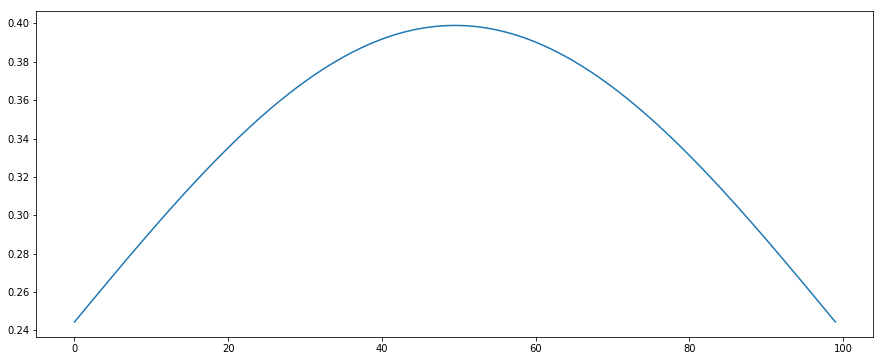

In [5]:
t = plt.plot(norm.pdf(x, loc=0, scale=1))

有的分布, 例如**卡方分布**, 需要使用额外的参数, 对于卡方分布, 需要使用**自由度**参数.

**备注**, 与本章目的无关, 对于卡方分布, 往往使用其*标准*分布, 它也可以像正态分布一样, 有位置的平移和峰度的区别. 如果使用`loc`和`scale`, `chi.pdf(x, df, loc, scale)`等价于`chi.pdf(y, df) / scale`, 其中`y = (x - loc) / scale`.

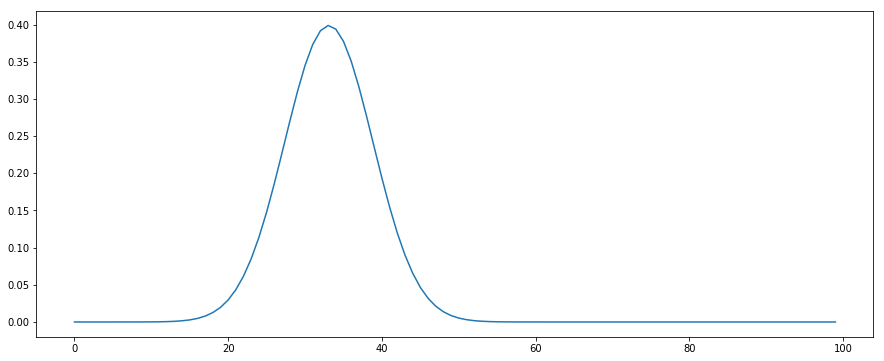

In [6]:
df = 7
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
t = plt.plot(norm.pdf(x, df))

有的分布, 完全与这两个参数无关, 例如常见的**二项分布**. 它需要的是`n`, `p`两个参数表示次数和单次概率. 这里我们模型投掷20次硬币的分布情况.

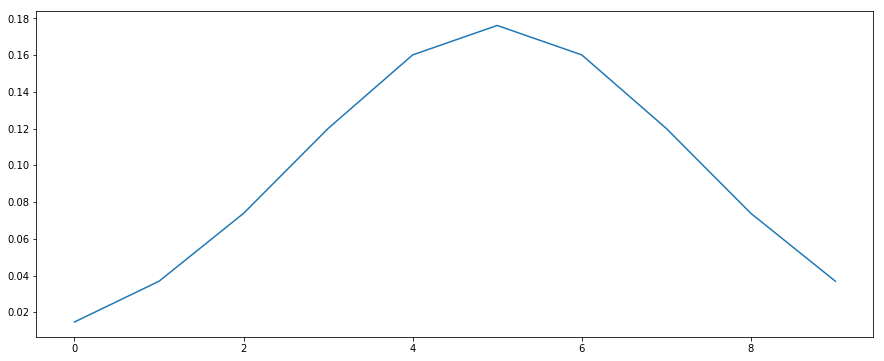

In [7]:
n, p = 20, 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
t = plt.plot(binom.pmf(x, n, p))

### 统计函数

对于连续和离散分布, 有着共有的一些常用的方法.

#### stats

`stats(*args, moments="mv")`

给出分布的统计量. 可以给出的统计量有:

- `m`: 均值, mean
- `v`: 方差, variance
- `s`: 偏度, skew
- `k`: 峰度, kurtosis

使用`moments`函数指定.

In [8]:
# 正态分布
norm.stats(loc=1, scale=3, moments="mvsk")

(array(1.), array(9.), array(0.), array(0.))

In [9]:
# 卡方分布
chi2.stats(df=10, moments="mvsk")

(array(10.), array(20.), array(0.89442719), array(1.2))

#### cdf

- `cdf(x, *args)` 连续
- `cdf(k, *args)` 离散

**Cumulative distribution function**, **累积分布函数**. 返回给定的`x`(连续)或`k`离散坐标值对应的累计概率值.

In [10]:
# 正态分布
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 20)
x, norm.cdf(x)

(array([-2.32634787, -2.08146915, -1.83659043, -1.5917117 , -1.34683298,
        -1.10195426, -0.85707553, -0.61219681, -0.36731809, -0.12243936,
         0.12243936,  0.36731809,  0.61219681,  0.85707553,  1.10195426,
         1.34683298,  1.5917117 ,  1.83659043,  2.08146915,  2.32634787]),
 array([0.01      , 0.01869549, 0.03313519, 0.05572475, 0.08901702,
        0.13524078, 0.19570157, 0.27020378, 0.35669088, 0.45127553,
        0.54872447, 0.64330912, 0.72979622, 0.80429843, 0.86475922,
        0.91098298, 0.94427525, 0.96686481, 0.98130451, 0.99      ]))

In [11]:
# 二项分布
n, p = 20, 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x, binom.cdf(x, n, p)

(array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 array([0.02069473, 0.05765915, 0.13158798, 0.25172234, 0.41190147,
        0.58809853, 0.74827766, 0.86841202, 0.94234085, 0.97930527]))

#### sf

- `cdf(x, *args)` 连续
- `cdf(k, *args)` 离散

**Survival function**, 剩余密度的累计, 也可以定义为`1 - cdf`

In [12]:
# 正态分布
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 20)
x, norm.sf(x)

(array([-2.32634787, -2.08146915, -1.83659043, -1.5917117 , -1.34683298,
        -1.10195426, -0.85707553, -0.61219681, -0.36731809, -0.12243936,
         0.12243936,  0.36731809,  0.61219681,  0.85707553,  1.10195426,
         1.34683298,  1.5917117 ,  1.83659043,  2.08146915,  2.32634787]),
 array([0.99      , 0.98130451, 0.96686481, 0.94427525, 0.91098298,
        0.86475922, 0.80429843, 0.72979622, 0.64330912, 0.54872447,
        0.45127553, 0.35669088, 0.27020378, 0.19570157, 0.13524078,
        0.08901702, 0.05572475, 0.03313519, 0.01869549, 0.01      ]))

In [13]:
# 二项分布
n, p = 20, 0.5
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x, binom.sf(x, n, p)

(array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 array([0.97930527, 0.94234085, 0.86841202, 0.74827766, 0.58809853,
        0.41190147, 0.25172234, 0.13158798, 0.05765915, 0.02069473]))

#### ppf

- `ppf(q, *args)`

**Percent point function**, **百分位函数**. 给定一个百分数, 返回这个分布累计密度为这个数时对应的随机变量的值(即**百分位**).

`cdf`的反函数.

In [14]:
# 正态分布
x = np.linspace(0.01, 0.99, 20)
x, norm.ppf(x)

(array([0.01      , 0.06157895, 0.11315789, 0.16473684, 0.21631579,
        0.26789474, 0.31947368, 0.37105263, 0.42263158, 0.47421053,
        0.52578947, 0.57736842, 0.62894737, 0.68052632, 0.73210526,
        0.78368421, 0.83526316, 0.88684211, 0.93842105, 0.99      ]),
 array([-2.32634787, -1.54165318, -1.20990385, -0.97517455, -0.78469643,
        -0.61919262, -0.46917106, -0.32906671, -0.19516579, -0.06468971,
         0.06468971,  0.19516579,  0.32906671,  0.46917106,  0.61919262,
         0.78469643,  0.97517455,  1.20990385,  1.54165318,  2.32634787]))

#### mean, median, var, std

- `mean(*args)`
- `median(*args)`
- `var(*args)`
- `std(*args)`

均值, 中位数, 方差, 标准差. 选定分布, 传入分布的参数, 得到对应的统计量.

In [15]:
# 标准正态分布
norm.mean(), norm.median(), norm.var(10), norm.std(10)

(0.0, 0.0, 1.0, 1.0)

In [16]:
# 二项分布
binom.mean(10, 0.5), binom.median(10, 0.5), binom.var(10, 0.5), binom.std(10, 0.5)

(5.0, 5.0, 2.5, 1.5811388300841898)

#### expect

- 正态分布
    - `expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)`
- 二项分布
    - `expect(func, args=(n, p), loc=0, lb=None, ub=None, conditional=False)`

求**函数的期望**. 函数是关于该**随机变量**的**单变量函数**. 求在自变量为指定的分布情况下, 对应函数的期望值.

其中**分布的参数**由`args`, `loc`, `scale`参数共同指定. 如果像正态分布一样, 只使用到`loc`和`scale`, `args`传空`tuple`即可.

In [17]:
def x_plus_5(x):
    return x + 5

In [18]:
# 标准正态分布
norm.expect(x_plus_5, args=(), loc=0, scale=1)

4.999999999999998

In [19]:
# 二项分布
binom.expect(x_plus_5, args=(10, 0.5))

10.00000000000001

### 统计推断方法

#### interval

- `interval(alpha, *args)`

给定**置信水平**$\alpha$, 求出对应的区间范围. 如对于$\alpha=0.05$的双向$z$检验, 使用的就是**标准正态分布**, 对应的区间为:

In [20]:
alpha = 0.05
norm.interval((2 - alpha) / 2)

(-2.241402727604945, 2.241402727604947)

### 采样

#### rvs

- `rvs(*args, size=1, random_state=None)`

选定分布类型和分布参数, 就可以进行采样了. `size`参数指定采样样本的数量, `random_state`可以指定随机种子.

In [21]:
# 标准正态分布
norm.rvs(size=20)

array([-0.07518554,  0.20304797, -1.14698151,  1.21465788, -0.26719107,
        1.09448395, -0.75106881, -1.38107981,  0.97681162,  0.02723926,
        0.03163507,  1.41163216,  0.35405607,  0.7989187 ,  0.86508305,
       -0.60533099, -0.7849912 , -0.73408228,  1.23046816,  0.4392824 ])

In [22]:
# 二项分布
binom.rvs(20, 0.5, size=20)

array([11, 10, 10, 13,  7, 11,  9,  7, 13, 11,  7,  7,  8,  7, 13, 13, 14,
       10, 11,  7])

### 拟合

#### fit

- `fit(data, *args)`

使用数据拟合得到分布的参数. 假设这些数据来自于这种类型分布的抽样, 现在要推算出分布对应的参数.

也可以指定参数, 这里指定的参数作为**先验分布**来使用.

推算参数的方法为: **Maximum Likelihood Estimation, MLE**, **最大似然法**.

只有部分分布支持拟合(原因: 参数的可导性). 以正态分布为例子进行说明.

首先使用标准正态分布, 抽样生成数据, 再对数据进行拟合.

In [23]:
data = norm.rvs(size=100)
norm.fit(data)

(0.0022467502682304197, 0.9544937497006565)

使用更大的数据量, 拟合更准确.

In [24]:
data = norm.rvs(size=100000)
norm.fit(data)

(0.0013160936919521882, 1.0035769090418196)

在大样本量的情况下, 先验参数的选择并不重要.

In [25]:
data = norm.rvs(size=100000)
norm.fit(data, loc=2, scale=2)

(-0.006140183965886018, 0.9979153641748688)

## 连续分布和离散分布不同的方法

### pdf和pmf

- `pdf`: **Probability density function**, 连续随机变量的**概率密度函数**
- `pmf`: **Probability mass function**, 离散随机变量的**概率质量函数**

两者的意义是一样的, 只是对应连续和离散的问题.

- `pdf(x, *args)`
- `pmf(k, *args)`

即给定随机变量的一个值, 返回这个值对应的概率密度(连续)或概率(离散).

In [26]:
# 标准正态分布
norm.pdf(0)

0.3989422804014327

In [27]:
# 二项分布
binom.pmf(8, n=10, p=0.5)

0.04394531249999999